In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
import pandas as pd

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


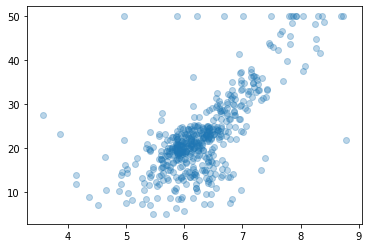

In [6]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

In [7]:
X = array(boston['RM'])
Y = array(boston['MEDV'])

In [8]:
class LinearRegretion():
    def __init__(self, t0=rand(), t1=rand()):
        self.t0 = t0
        self.t1 = t1
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        return self.t0 + self.t1*x
    
    def mse(self, x, y):
        dif = self.forward(x) - y
        sq = dif*dif
        sumatory = sq.sum()
        
        m = x.shape[0]
        
        error = sumatory/(2*m)
        
        return error
    
    def fit(self, x, y, epochs=1, lr=0.01):
        alpha = (lr/x.shape[0])
        
        for i in range(1, epochs+1):
            
            dif0 = self.forward(x) - y
            dif1 = (self.forward(x) - y)*x
            
            temp0 = self.t0 - alpha*dif0.sum()
            temp1 = self.t1 - alpha*dif1.sum()
            
            self.t0 = temp0
            self.t1 = temp1
            
        print(" MSE: ", self.mse(x, y), " T0: ", self.t0, " T1: ", self.t1)

In [9]:
h = LinearRegretion(1, 1)

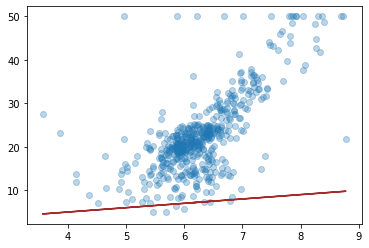

In [10]:
scatter(X, Y, alpha=0.3)
plot(X, h(X), c="brown")
show()

In [11]:
h.fit(X, Y, epochs=100000, lr=0.03)

 MSE:  21.80027588558478  T0:  -34.67062077642869  T1:  9.102108981178757


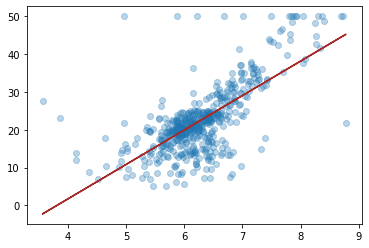

In [12]:
scatter(X, Y, alpha=0.3)
plot(X, h(X), c="brown")
show()

In [13]:
h.t0

-34.67062077642869

In [14]:
h.t1

9.102108981178757

In [15]:
h.mse(X, Y)

21.80027588558478

In [16]:
round(h(6), 2)*1000

19940.0